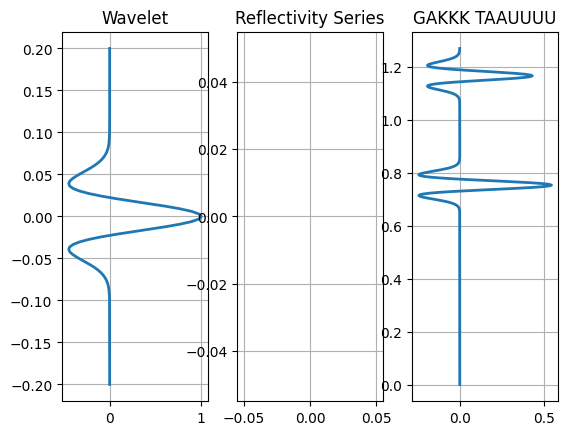

In [2]:
#Import Modul
import numpy as np
import matplotlib.pyplot as plt
import modulbuatan as mb
from modulbuatan import wavelet

v   = np.array([350, 1000, 2000])
rho = np.array([1700,2000,2500])
d = np.array([0,100,200])
 
v, rho, d = np.array(v, dtype=float), np.array(rho, dtype=float), np.array(d, dtype=float)
usingT = False
nlayer = len(v) # number of layers

assert len(rho) == nlayer, 'Number of layer densities must match number of layer velocities'
assert len(d)   == nlayer, 'Number of layer tops must match the number of layer velocities'

Z   = rho*v                       # acoustic impedance
R   = np.diff(Z)/(Z[:-1] + Z[1:]) # reflection coefficients
twttop  = 2*d[1:]/v[:-1]
twttop  = np.cumsum(twttop)

resolution = 100 
dpth   = np.linspace(0,np.max(d)+np.max(np.diff(d)),resolution)
nd     = len(dpth)

rholog  = np.zeros(nd)
vlog    = np.zeros(nd)
zlog    = np.zeros(nd)
rseries = np.zeros(nd)
twti    = np.zeros(nd)

for i in range(nlayer):
    di         = (dpth >= d[i])
    rholog[di] = rho[i]
    vlog[di]   = v[i]
    zlog[di]   = Z[i]
    if i < nlayer-1:
        di  = np.logical_and(di, dpth < d[i+1])
        ir = np.arange(resolution)[di][-1:][0] #find(di, 1, 'last' )
        if usingT:
            if i == 0:
                rseries[ir] = R[i]
            else:
                rseries[ir] = R[i]*np.prod(1-R[i-1]**2)
        else:
            rseries[ir] = R[i]
    if i > 0:
        twti[di] = twttop[i-1]

t  = 2.0*dpth/vlog + twti

# Make wavelet
# Wavelet type and Frequency (Hz):
wavtyp = 'RICKER'
wavf   = np.array([10])
dtwav  = np.abs(np.min(np.diff(t)))
twav   = np.arange(-2.0/np.min(wavf), 2.0/np.min(wavf), dtwav)
wav = {'RICKER':wavelet}[wavtyp](wavf,twav)

# create synthetic seismogram
tseis = np.arange(0,np.max(t),dtwav) + np.min(twav)
tr    = t[np.abs(rseries) > 0]
rseriesconv = np.zeros(len(tseis))
for i in range(len(tr)):
    index = np.abs(tseis - tr[i]).argmin()
    rseriesconv[index] = R[i]

seis = np.convolve(wav,rseriesconv)
tseis = np.min(twav)+dtwav*np.arange(len(seis))
index = np.logical_and(tseis >= 0, tseis <= np.max(t))
tseis = tseis[index]
seis  = seis[index]

plt.subplot(131)
plt.plot(wav,twav,linewidth=2)
plt.title('Wavelet')
plt.grid()

plt.subplot(132)
plt.plot()
plt.title('Reflectivity Series')
plt.grid()

#Plotting Graph
plt.subplot(133)
plt.plot(seis,tseis,linewidth=2)
plt.title("GAKKK TAAUUUU")
plt.grid()
plt.show()